# 所有比較與討論將放在最後

In [2]:
#讀入資料
import pandas as pd
Orignal = pd.read_csv('HW2_house-prices.csv')

#判斷格式是否為數字
Format = [Orignal[Orignal.columns[i]].dtype for i in range(81)]
FormatIsntNumber = list()
print("Colums's format is not number:", end = ' ')
for i in range(len(Format)):
    if Format[i] == 'O':
        print(Orignal.columns[i], end = ' ')
        FormatIsntNumber.append(Orignal.columns[i])

#判斷是否有缺失
missColums = list(set(Orignal.columns).symmetric_difference(set(Orignal.dropna(axis = 1).columns)))
print("\n\nColums with miss value:", end = ' ')
for miss in missColums:
    print(miss, end = ' ')

Colums's format is not number: MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition 

Colums with miss value: BsmtQual GarageQual GarageFinish FireplaceQu BsmtFinType2 Electrical MasVnrArea BsmtExposure MiscFeature Alley GarageYrBlt GarageType MasVnrType BsmtFinType1 BsmtCond GarageCond LotFrontage Fence PoolQC 

In [3]:
#選擇編碼 LabelEncoder('L') or OrdinalEncoder('O')
from sklearn import preprocessing
import numpy as np
Data = Orignal.copy()
encodeway = input("Iput 'L' for Label Encoder and 'O' for Ordinal Encoder:")
if encodeway == 'L':
    for i in range(len(FormatIsntNumber)):
        encode = preprocessing.LabelEncoder().fit(Orignal[FormatIsntNumber[i]].dropna())
        if not FormatIsntNumber[i] in missColums:
            Data[FormatIsntNumber[i]] = encode.transform(Orignal[FormatIsntNumber[i]])
        else:
            buffer = encode.transform(Orignal[FormatIsntNumber[i]].dropna())
            index = 0
            result = list()
            for j in range(Orignal.shape[0]):
                if str(Orignal[FormatIsntNumber[i]][j])!='nan':
                    result.append(buffer[index])
                    index += 1
                else:
                    result.append(np.nan)
            Data[FormatIsntNumber[i]] = result
elif encodeway == 'O':
    for i in range(len(FormatIsntNumber)):
        encode = preprocessing.OrdinalEncoder().fit(Orignal[[FormatIsntNumber[i], 'Id']].dropna())
        if not FormatIsntNumber[i] in missColums:
            Data[FormatIsntNumber[i]] = list(i[0] for i in encode.transform(Orignal[[FormatIsntNumber[i], 'Id']]))
        else:
            buffer = encode.transform(Orignal[[FormatIsntNumber[i], 'Id']].dropna())
            index = 0
            result = list()
            for j in range(Orignal.shape[0]):
                if str(Orignal[FormatIsntNumber[i]][j])!='nan':
                    result.append(buffer[index][0])
                    index += 1
                else:
                    result.append(np.nan)
            Data[FormatIsntNumber[i]] = result
else:
    raise NameError

print("Encode Data")
Data

Iput 'L' for Label Encoder and 'O' for Ordinal Encoder:L
Encode Data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,NaN,3,3,0,...,0,NaN,NaN,NaN,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,NaN,3,3,0,...,0,NaN,NaN,NaN,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,NaN,0,3,0,...,0,NaN,NaN,NaN,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,NaN,0,3,0,...,0,NaN,NaN,NaN,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,NaN,0,3,0,...,0,NaN,NaN,NaN,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,NaN,3,3,0,...,0,NaN,NaN,NaN,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,NaN,3,3,0,...,0,NaN,2.0,NaN,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,NaN,3,3,0,...,0,NaN,0.0,2.0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,NaN,3,3,0,...,0,NaN,NaN,NaN,0,4,2010,8,4,142125


In [4]:
#填補缺失值
Data = Data.fillna(Data.mean())
print("fill miss Data")
Data

fill miss Data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0.450549,3,3,0,...,0,1.142857,1.427046,1.907407,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0.450549,3,3,0,...,0,1.142857,1.427046,1.907407,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0.450549,0,3,0,...,0,1.142857,1.427046,1.907407,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0.450549,0,3,0,...,0,1.142857,1.427046,1.907407,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0.450549,0,3,0,...,0,1.142857,1.427046,1.907407,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0.450549,3,3,0,...,0,1.142857,1.427046,1.907407,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,0.450549,3,3,0,...,0,1.142857,2.000000,1.907407,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,0.450549,3,3,0,...,0,1.142857,0.000000,2.000000,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,0.450549,3,3,0,...,0,1.142857,1.427046,1.907407,0,4,2010,8,4,142125


Input Data is Orignal Data

Mean-Squared-Error
Linear model: 1766527340.0152185
Ridge  model: 1764490528.869051
Lasso  model: 1765984704.8111973


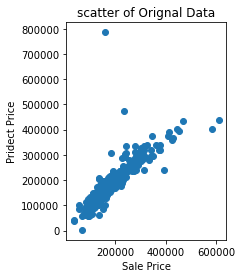

In [5]:
#進行訓練
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#分割訓練測試之標籤與資料
trainData, testData, a, b = train_test_split(Data, range(Data.shape[0]), test_size=0.3, random_state=None)

def fromDataframeToPrediectResultAndDrawPicture(comment, trainData, testData):
    print("Input Data is", comment, "Data", end = '\n\n')
    
    #取出標籤、移除ID、並將DataFrame轉成nparray
    try:
        trainData.drop(['Id'], axis = 1, inplace = True)
        testData.drop(['Id'], axis = 1, inplace = True)
    except KeyError:
        #若沒有ID則忽略
        pass
    trainLabel, testLabel = list(trainData['SalePrice']), list(testData['SalePrice'])
    trainData = np.array(trainData.drop(['SalePrice'], axis = 1))
    testData = np.array(testData.drop(['SalePrice'], axis = 1))
    
    #訓練
    linearModel = LinearRegression().fit(trainData, trainLabel)
    RidgeModel = Ridge().fit(trainData, trainLabel)
    LassoModel = Lasso().fit(trainData, trainLabel)
    
    #預測
    linearRegResult = linearModel.predict(testData)
    RidgeResult = RidgeModel.predict(testData)
    LassoResult = LassoModel.predict(testData)
    
    #測試MSE以判斷準確度
    print("Mean-Squared-Error")
    print("Linear model:", mean_squared_error(testLabel, linearRegResult))
    print("Ridge  model:", mean_squared_error(testLabel, RidgeResult))
    print("Lasso  model:", mean_squared_error(testLabel, LassoResult))
    
    #經過觀察 Ridege的誤差最小，以此做為製圖
    %matplotlib inline
    plt.ylabel('Pridect Price')
    plt.xlabel('Sale Price')
    ax = plt.gca()
    ax.set_aspect(1)
    plt.scatter(testLabel, RidgeResult)
    plt.title("scatter of "+comment+' Data')

#測試全部資料
fromDataframeToPrediectResultAndDrawPicture("Orignal",trainData, testData)

Input Data is Standization Data

Mean-Squared-Error
Linear model: 1.4902417127075366e+22
Ridge  model: 0.2675767520994004
Lasso  model: 1.0000000000000002


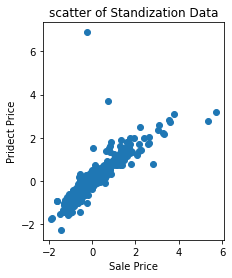

In [6]:
#將資料經過標準化後測試
trainDataStandard = pd.DataFrame(trainData.copy())
testDataStandard = pd.DataFrame(testData.copy())
for i in range(trainData.shape[1]):
    trainDataStandard[trainDataStandard.columns[i]] = preprocessing.scale(trainDataStandard[trainDataStandard.columns[i]])
    testDataStandard[testDataStandard.columns[i]] = preprocessing.scale(testDataStandard[testDataStandard.columns[i]])
fromDataframeToPrediectResultAndDrawPicture("Standization", trainDataStandard,testDataStandard)

Id              -0.021917
MSSubClass      -0.084284
MSZoning        -0.166872
LotFrontage      0.334901
LotArea          0.263843
                   ...   
MoSold           0.046432
YrSold          -0.028923
SaleType        -0.054911
SaleCondition    0.213092
SalePrice        1.000000
Name: SalePrice, Length: 81, dtype: float64


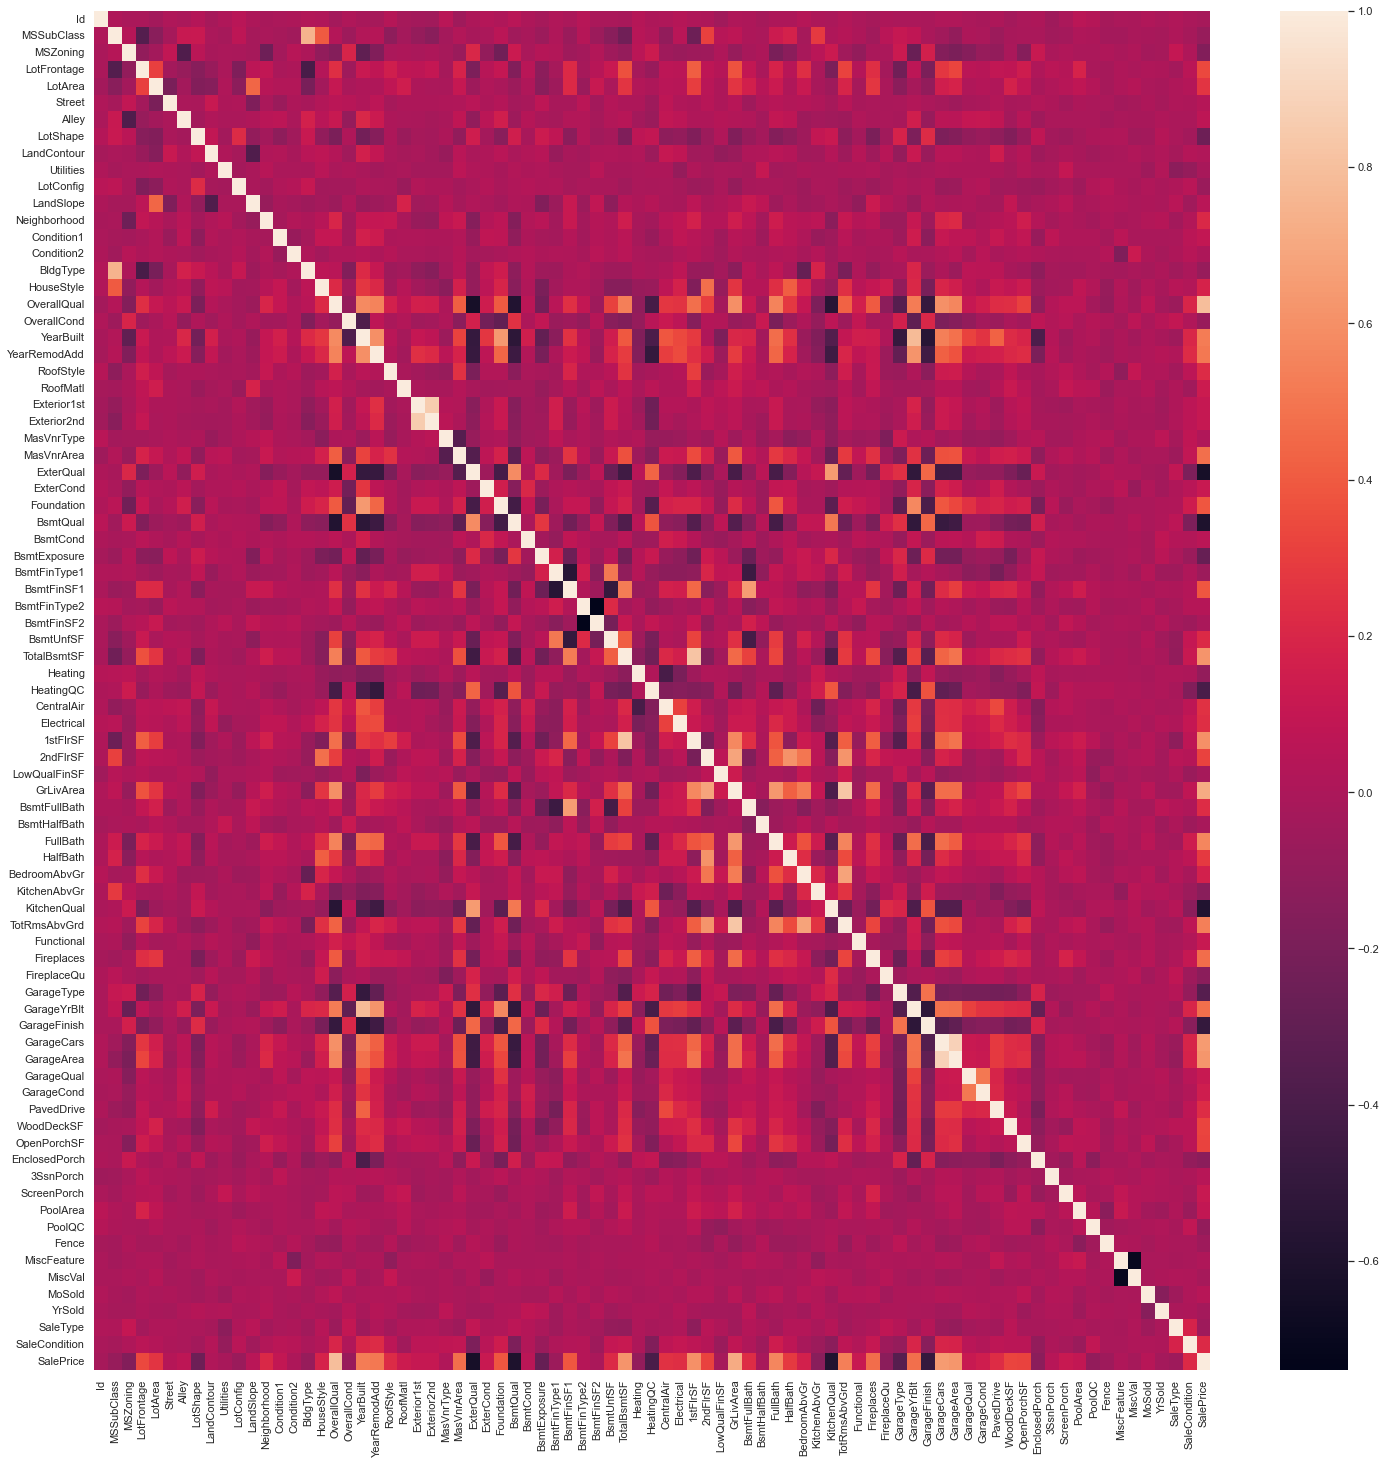

In [7]:
#透過seaborn顯示各columns之相關係數
import seaborn as sns
correlation = Data.corr()
sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(correlation, annot = False)
print(correlation['SalePrice'])

Input Data is largest correlation four columns Data

Mean-Squared-Error
Linear model: 1770811280.926563
Ridge  model: 1771150072.5712247
Lasso  model: 1770853978.4943452


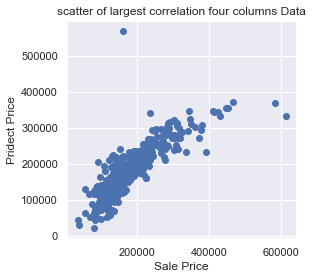

In [8]:
#依照'SalePrice'排序相關係數
SalePriceRelation = sorted(dict(correlation['SalePrice']).items(), key=lambda item: item[1], reverse = True)

#將相關係數最高=>'SalePrice'本身選取
MaxRelationtrainData = pd.DataFrame(trainData[SalePriceRelation[0][0]])
MaxRelationtestData = pd.DataFrame(testData[SalePriceRelation[0][0]])
MinRelationtrainData = pd.DataFrame(trainData[SalePriceRelation[0][0]])
MinRelationtestData = pd.DataFrame(testData[SalePriceRelation[0][0]])
#MaxRelationtrainData
#trainData[SalePriceRelation[1][0]]
#選取最高及最低四者
for i in range(4):
    MaxRelationtrainData[SalePriceRelation[i+1][0]] = trainData[SalePriceRelation[i+1][0]]
    MaxRelationtestData[SalePriceRelation[i+1][0]] = testData[SalePriceRelation[i+1][0]]
    MinRelationtrainData[SalePriceRelation[-i][0]] = trainData[SalePriceRelation[-i][0]]
    MinRelationtestData[SalePriceRelation[-i][0]] = testData[SalePriceRelation[-i][0]]

#進行相關係數最高四者訓練
fromDataframeToPrediectResultAndDrawPicture("largest correlation four columns", MaxRelationtrainData,MaxRelationtestData)

Input Data is smellest correlation four columns Data

Mean-Squared-Error
Linear model: 2850277790.378089
Ridge  model: 2849835275.2152195
Lasso  model: 2850273408.474319


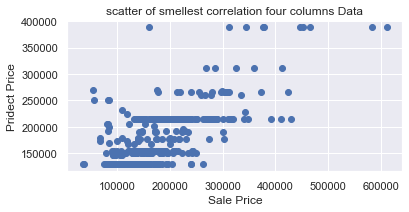

In [9]:
#相關係數最低四者訓練
fromDataframeToPrediectResultAndDrawPicture("smellest correlation four columns", MinRelationtrainData,MinRelationtestData)

Text(0.5, 1.0, 'scatter of GrLivArea & SalePrice')

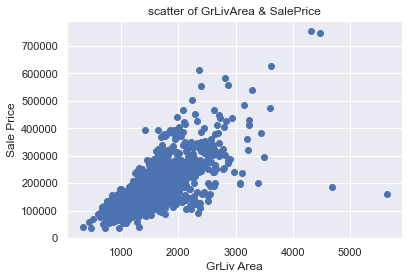

In [10]:
%matplotlib inline
plt.ylabel('Sale Price')
plt.xlabel('GrLiv Area')
plt.scatter(Data['GrLivArea'],Data['SalePrice'])
plt.title('scatter of GrLivArea & SalePrice')

Input Data is Remove Outliners Data

Mean-Squared-Error
Linear model: 339593177.6577941
Ridge  model: 341926646.4725716
Lasso  model: 339594988.2693539


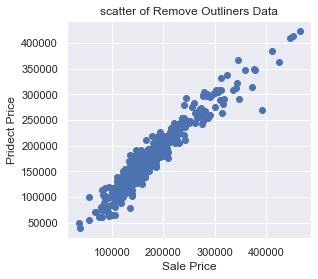

In [11]:
#移除outliner後進行預測
RmoveOutlinerTrainData = trainData[(trainData['GrLivArea'] < 3000) & (trainData['SalePrice'] <500000)]
RmoveOutlinerTrainData = testData[(testData['GrLivArea'] < 3000) & (testData['SalePrice'] <500000)]
fromDataframeToPrediectResultAndDrawPicture("Remove Outliners",RmoveOutlinerTrainData,RmoveOutlinerTrainData)

# 比較與討論
## 1.編碼方式比較
選取兩種Encoder方式，分別為Label encoder與 Ordinal encoder。

Label encoder只需要一維的資料就可以進行編碼，而Ordinal encoder兩個特徵的資料才可以進行編碼，這裡選用"Id"和目標特徵進行編碼。

比較這兩者的編碼之後發現，**兩者結果沒有太大差異**。

## 2.經過標準化處理比較
觀察經過原先的資料與經過標準化之後的比較結果，發現:

**原先的資料**經過線性回歸後的結果所計算的**MSG較大**，原因是因為受到原先資料當中數值大小的影響。

而經過**標準化後的資料**經過回歸發現所計算的**MSG數值小很多**，因為已經將資料標準化，減少受到各個欄位之中數值大小的影響；而且各個模型之間的MSG數值的差異也非常明顯。

然而經過兩者比較之後可以發現，除了一些Outliner之外，**兩者散步圖在形狀分布上大致相同**，一開始分布於x = y周圍，當實際售價愈高時，預測值則比實際售價略低。可以推論原先數值較小的特徵對結果影響不大，經過標準化之後並沒有影響太多。


## 3.三種模型比較
比較Linear Ridge Lasso三種線性迴歸的模型的MSG數值

可以發現，除了最後一項移除outliner之外，**Ridge的MSG**都是**最低的**，尤其可以看到標準化之後的結果可以發現差距更加明顯。

因此選用Ridge的結果進行預測與實際價格散佈圖繪製。

## 4.選取前四高、前四低相關係數與全部特徵預測結果比較
依照和SalePrice相關程度的程度進行排序，選取前四高和前四低的模型進行訓練

其中比較**全部特徵訓練的結果**和**只有前四高相關特徵的訓練結果**，發現這**兩者的結果大致相同**，就連outliner的分布也大致相同。

可以得到對於線性迴歸的模型而言，只需要選取相關係數最高的幾項就可以得到結果。

然而觀察只用**最低四項特徵進行訓練的結果**，發現預測的房屋售價呈現數條水平線分布，和實際售價並沒有關係，顯示對於線性模型而言，並不適合使用低相關的特徵。

## 5.移除outliner比較
首先畫出，特徵GrLivArea和SalePrice兩者的散步圖，可以發現兩者呈現散型的分布，數值愈大兩者的關係越小。

將數值過大的資料視為outlienr，因此選擇將SalePrice>50000或GrLiveArea>3000的資料刪除後重新訓練。

重新訓練後可以發現實際售價和預測售價相較於原本的訓練結果更加靠近x=y的直線，且MSG的數值更下降了六倍，比沒有刪除ouliner的結果更佳。